In [44]:
import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

import plotly.graph_objects as go
import statsmodels.api as sm
import math

In [97]:
solartab = Table.read_table("https://raw.githubusercontent.com/jamesyoung4/finalproj118/main/solar1719.csv")
solartab

STATENAME,STATE,2017,2018,2019,AVG
ALABAMA,AL,0.15,0.29,0.3,0.246667
ALASKA,AK,0.03,0.05,0.1,0.06
ARIZONA,AZ,6.04,6.17,6.6,6.27
ARKANSAS,AR,0.06,0.36,0.4,0.273333
CALIFORNIA,CA,15.56,18.63,19.9,18.03
COLORADO,CO,2.67,3.17,3.2,3.01333
CONNECTICUT,CT,1.34,1.64,1.9,1.62667
DELAWARE,DE,1.96,2.77,3.2,2.64333
DISTRICT OF COLUMBIA,DC,nan,48.1,65,56.55
FLORIDA,FL,0.49,1.16,1.9,1.18333


In [98]:
solarmap = go.Figure(data=go.Choropleth(
    locations=solartab.column('STATE'), 
    z = solartab.column('AVG'), 
    locationmode = 'USA-states',
    colorscale = 'Greens',
    colorbar_title = "%",
))

solarmap.update_layout(
    title_text = 'Average Solar as a % of Total Power Generation by State (2017-2019)',
    geo_scope='usa', 
)

solarmap.show()

## 1. Income

In [118]:
incometab = Table.read_table("https://raw.githubusercontent.com/jamesyoung4/finalproj118/main/incometab.csv")
incometab

State,2019,2018,2017,AVG
Alabama,56200,49936,51113,52416.3
Alaska,78394,68734,72231,73119.7
Arizona,70674,62283,61125,64694
Arkansas,54539,49781,48829,51049.7
California,78105,70489,69759,72784.3
Colorado,72499,73034,74172,73235
Connecticut,87291,72812,72780,77627.7
Delaware,74194,65012,62318,67174.7
District of Columbia,93111,85750,83382,87414.3
Florida,58368,54644,53681,55564.3


In [119]:
regtable1 = Table().with_columns('x',incometab.column('AVG'),
                               'y', solartab.column('AVG'))

In [120]:
x = regtable1.column('x').reshape((-1, 1))
y = regtable1.column('y')
x = sm.add_constant(x)
avgincmodel = sm.OLS(y, x)
results = avgincmodel.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     10.73
Date:                Wed, 09 Dec 2020   Prob (F-statistic):            0.00194
Time:                        03:35:21   Log-Likelihood:                -176.20
No. Observations:                  51   AIC:                             356.4
Df Residuals:                      49   BIC:                             360.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.3184      7.062     -2.735      0.009     -33.510      -5.126
x1             0.0004      0.000      3.276      0.002       0.000       0.001
==============================================================================
Omnibus:                       78.009   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1094.002
Skew:                           4.055   Prob(JB):                    2.76e-238
Kurtosis:                      24.191   Cond. No.                     4.26e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

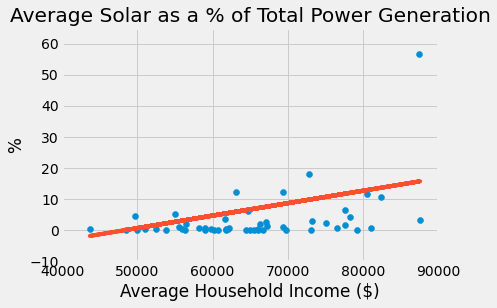

In [122]:
plots.scatter(regtable1.column('x'),y)
plots.plot(x, -19.3184 +  0.0004 * x, '-')
plots.xlabel("Average Household Income ($)")
plots.ylabel("%")
plots.title("Average Solar as a % of Total Power Generation")
plots.xlim(40000,90000)
plots.ylim(-10,65)
plots.show()

## 2. Temperature

In [16]:
temptab = Table.read_table("https://raw.githubusercontent.com/jamesyoung4/finalproj118/main/temp1719.csv")

In [89]:
tempmap = go.Figure(data=go.Choropleth(
    locations=temptab.column('State Abbrev'), 
    z = temptab.column('AVG'), 
    locationmode = 'USA-states',
    colorscale = 'Oranges',
    colorbar_title = "°F",
))

tempmap.update_layout(
    title_text = 'Average Temperature (2017-2019)',
    geo_scope='usa', 
)

tempmap.show()

In [90]:
regtable2 = Table().with_columns('x',temptab.column('AVG'),
                               'y', solartab.column('AVG'))

In [91]:
x = regtable2.column('x').reshape((-1, 1))
y = regtable2.column('y')
x = sm.add_constant(x)
avgtempmodel = sm.OLS(y, x)
results = avgtempmodel.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                  0.001425
Date:                Wed, 09 Dec 2020   Prob (F-statistic):              0.970
Time:                        03:25:29   Log-Likelihood:                -181.25
No. Observations:                  51   AIC:                             366.5
Df Residuals:                      49   BIC:                             370.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2779      7.061      0.464      0.645     -10.911      17.467
x1             0.0049      0.131      0.038      0.970      -0.257       0.267
==============================================================================
Omnibus:                       90.668   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1821.861
Skew:                           4.969   Prob(JB):                         0.00
Kurtosis:                      30.542   Cond. No.                         316.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

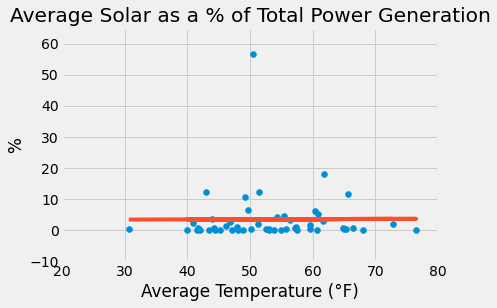

In [93]:
plots.scatter(regtable2.column('x'),y)
plots.plot(x, 3.2779 + 0.0049 * x, '-')
plots.xlabel("Average Temperature (°F)")
plots.ylabel("%")
plots.title("Average Solar as a % of Total Power Generation")
plots.xlim(20,80)
plots.ylim(-10,65)
plots.show()

## 3. Sunshine

In [53]:
#this next table will be STATENAME and the TOTAL HOURS (average number of sunny hours a place normally has in a year)
#0 represents missing data

TOTAL_HOURS= (2641, 2061, 3806, 2771, 3055, 3204, 2585, 0, 0, 2927, 2986, 0, 2993, 2567, 2440, 2691, 2922, 2514, 2649, 2513, 2582, 2634, 2392, 2711, 2720, 2690, 2698, 2762, 3646, 2519, 2499, 3415, 2120, 2651, 2738, 2183, 3089, 2341, 2614, 2606, 2826, 2947, 2510, 2850, 3029, 2295, 2829, 2170, 0, 2428, 3073)
log_TOTAL_HOURS = np.log(TOTAL_HOURS)

<ipython-input-53-4a92bbbc6be7>:5: RuntimeWarning:

divide by zero encountered in log



In [60]:
tab3=solartab.with_columns("TOTAL_HOURS", TOTAL_HOURS,
                           "log(TOTAL_HOURS)", log_TOTAL_HOURS)

In [61]:
#we are now going to drop rows where there is no data available for total ohours of sunshine
# use for report
tab3= (tab3.select("STATENAME", "AVG", "TOTAL_HOURS", "log(TOTAL_HOURS)"))
tab3= tab3.where("TOTAL_HOURS", are.above(0))
tab3= tab3.sort("AVG", descending=True)
tab3

STATENAME,AVG,TOTAL_HOURS,log(TOTAL_HOURS)
CALIFORNIA,18.03,3055,8.02453
NEVADA,12.4,3646,8.20139
VERMONT,12.3067,2295,7.73849
MASSACHUSETTS,10.53,2634,7.87626
UTAH,6.6,3029,8.01599
ARIZONA,6.27,3806,8.24433
NORTH CAROLINA,5.27333,2651,7.88269
NEW MEXICO,4.59667,3415,8.13593
NEW JERSEY,4.26333,2499,7.82365
IDAHO,3.44667,2993,8.00403


In [82]:
regtable3 = Table().with_columns('x',tab3.column('TOTAL_HOURS'),
                               'y', tab3.column('AVG'))

In [83]:
x = regtable3.column('x').reshape((-1, 1))
y = regtable3.column('y')
x = sm.add_constant(x)
avgsunmodel = sm.OLS(y, x)
results = avgsunmodel.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     6.326
Date:                Wed, 09 Dec 2020   Prob (F-statistic):             0.0155
Time:                        02:37:59   Log-Likelihood:                -126.76
No. Observations:                  47   AIC:                             257.5
Df Residuals:                      45   BIC:                             261.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.0390      4.159     -1.933      0.060     -16.416       0.338
x1             0.0038      0.002      2.515      0.016       0.001       0.007
==============================================================================
Omnibus:                       40.664   Durbin-Watson:                   0.456
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.336
Skew:                           2.422   Prob(JB):                     1.49e-25
Kurtosis:                       8.910   Cond. No.                     2.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

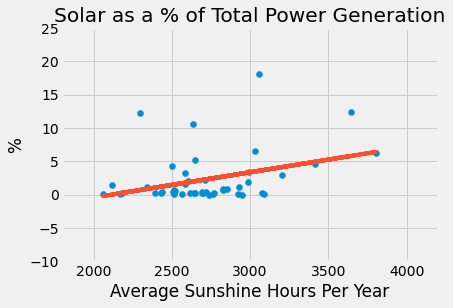

In [84]:
plots.scatter(regtable3.column('x'),y)
plots.plot(x, -8.0390 +  0.0038 * x, '-')
plots.xlabel("Average Sunshine Hours Per Year")
plots.ylabel("%")
plots.title("Solar as a % of Total Power Generation")
plots.xlim(1800,4200)
plots.ylim(-10,25)
plots.show()

## 4. Political Party Affiliation